<center>

# Testing Generated Random Light Intensity Data

</center>

## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from trng import LightRandom

## Generating True Random Numbers

In [2]:
n_samples = 40

In [4]:
lrng = LightRandom()
data_rand = lrng.rand((n_samples))
# data_randint = lrng.randint(low=-10, high=10, size=(n_samples))
# data_randn = lrng.randn((n_samples))
# DATA = pd.DataFrame(np.column_stack([data_rand, data_randint, data_randn]), columns=["rand", "randint", "randn"])

data_rand

array([0.76342322, 0.37513688, 0.42795992, 0.78527273, 0.18283775,
       0.16568555, 0.53929272, 0.44419511, 0.90438651, 0.01768507,
       0.43746898, 0.24234532, 0.60182263, 0.55920574, 0.51539951,
       0.93807715, 0.73442793, 0.793953  , 0.9442584 , 0.75512272,
       0.56599697, 0.49813743, 0.78366994, 0.07181055, 0.18314137,
       0.00254887, 0.54910333, 0.53494279, 0.82770886, 0.53546166,
       0.91883797, 0.02617069, 0.78608105, 0.68402698, 0.95725755,
       0.622376  , 0.5699184 , 0.55548169, 0.44048863, 0.41873098])

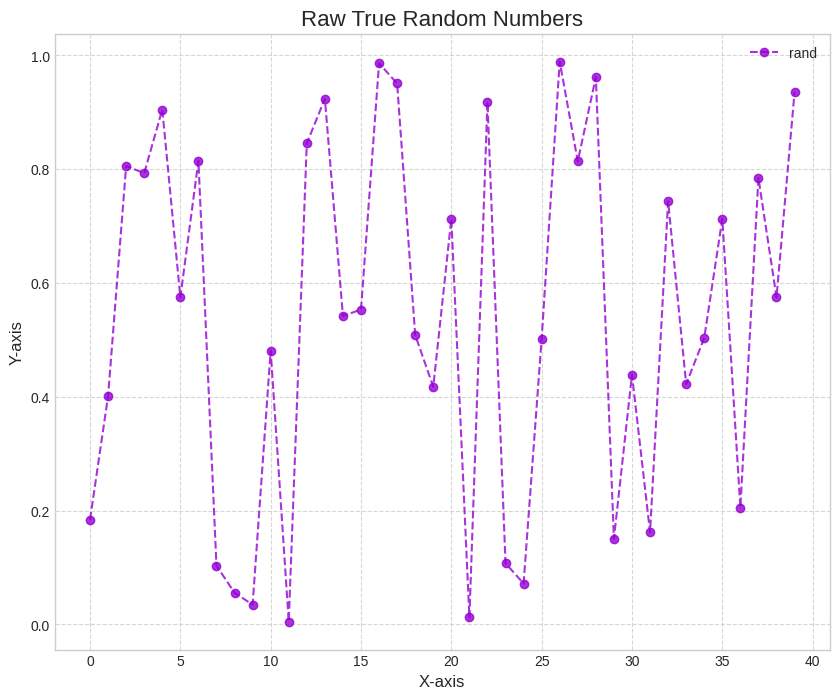

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=100
plt.figure(figsize=(10, 8), dpi=dpi)
plt.title("Raw True Random Numbers", fontsize=16)
plt.plot(np.array(range(len(data_rand))), data_rand, label="rand", marker="o", linestyle="--", color="darkviolet", alpha=0.8)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.grid(linestyle="--", alpha=0.8)
plt.legend()
plt.show()

In [5]:
DATA.to_csv("Generated True Random Numbers.csv", index=False)

In [6]:
DATA_np = pd.DataFrame({
    'rand': np.random.rand(n_samples),
    'randint': np.random.randint(-10, 10, n_samples),
    'randn': np.random.randn(n_samples)
})
DATA_np.to_csv("Generated Pseudo Random Numbers.csv", index=False)

## Visualising True Random Numbers

In [7]:
DATA = pd.read_csv("Generated True Random Numbers.csv")
DATA

,rand,randint,randn
0,0.184071,-4.0,-1.099001
1,0.401181,1.0,-1.335428
2,0.805703,-1.0,1.740909
3,0.792947,7.0,-0.113003
4,0.904922,9.0,-0.525861
5,0.574647,-9.0,-0.261279
6,0.814738,-4.0,0.284464
7,0.103044,5.0,0.328243
8,0.055468,8.0,0.962014
9,0.034501,-5.0,-0.514300


In [8]:
DATA.describe()

,rand,randint,randn
count,40.000000,40.00000,40.000000
mean,0.540201,-0.15000,0.042514
std,0.325088,5.38064,0.929939
min,0.004809,-9.00000,-1.908648
25%,0.200003,-4.25000,-0.517190
50%,0.547671,0.00000,0.043481
75%,0.814120,4.25000,0.840689
max,0.989210,9.00000,1.740909


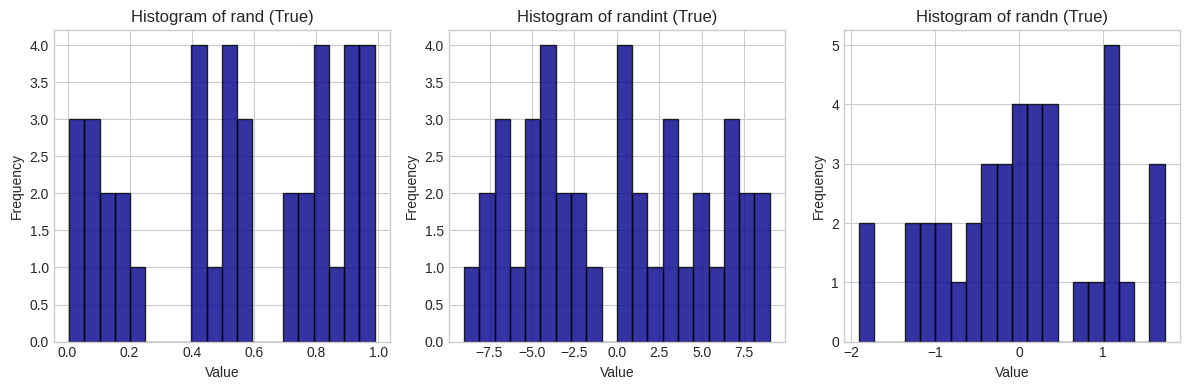

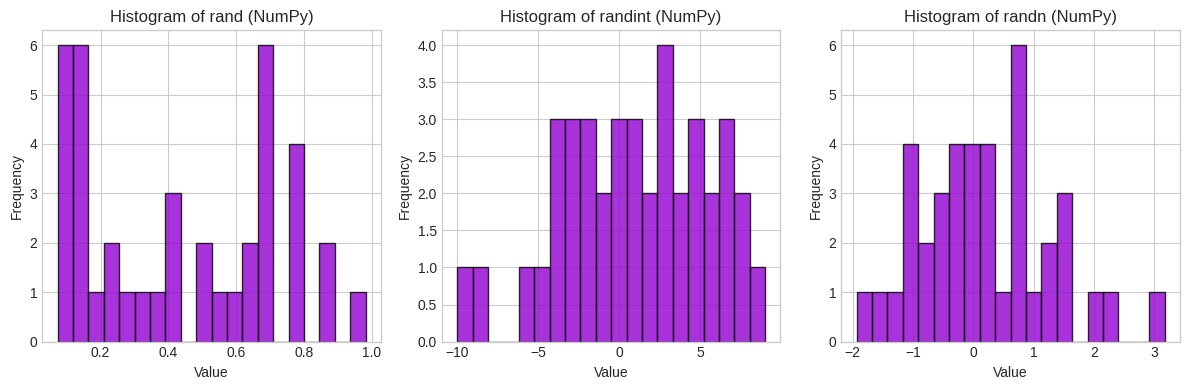

In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=100
plt.figure(figsize=(12, 4), dpi=dpi)

for i, col in enumerate(DATA.columns):
    plt.subplot(1, 3, i+1)
    plt.hist(DATA[col], bins=20, alpha=0.8, color="darkblue", edgecolor='black')
    plt.title(f"Histogram of {col} (True)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4), dpi=dpi)

for i, col in enumerate(DATA_np.columns):
    plt.subplot(1, 3, i+1)
    plt.hist(DATA_np[col], bins=20, alpha=0.8, color="darkviolet", edgecolor='black')
    plt.title(f"Histogram of {col} (NumPy)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

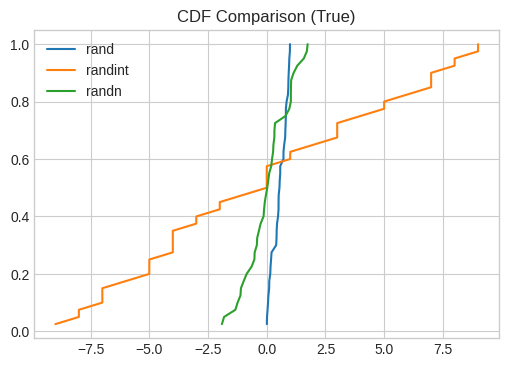

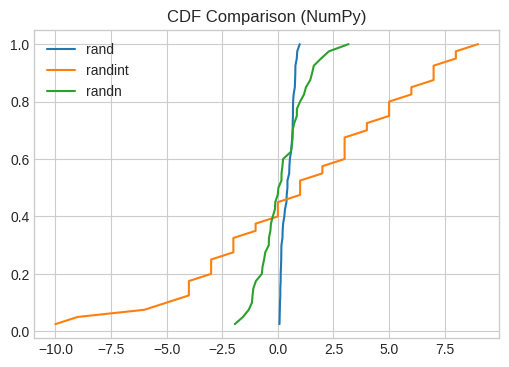

In [10]:
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

plt.figure(figsize=(6,4), dpi=dpi)
for col in DATA.columns:
    plot_cdf(DATA[col], col)
plt.title("CDF Comparison (True)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4), dpi=dpi)
for col in DATA_np.columns:
    plot_cdf(DATA_np[col], col)
plt.title("CDF Comparison (NumPy)")
plt.legend()
plt.grid(True)
plt.show()


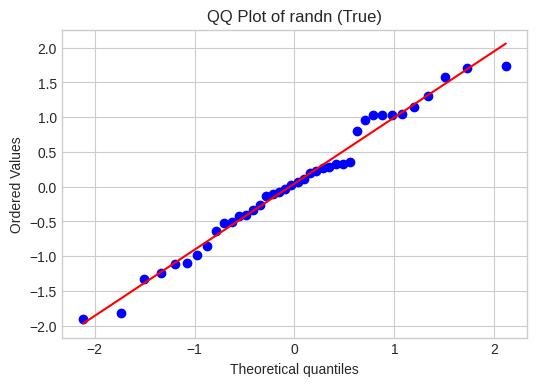

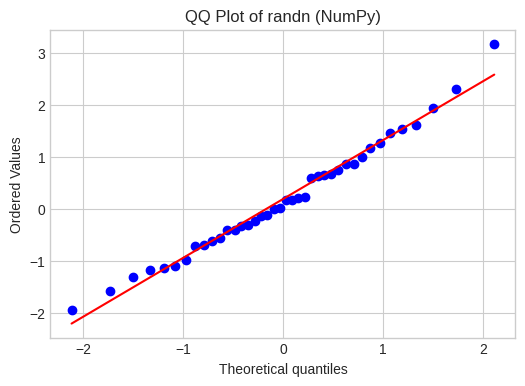

In [11]:
import scipy.stats as stats

plt.figure(figsize=(6,4), dpi=dpi)
stats.probplot(DATA['randn'], dist="norm", plot=plt)
plt.title("QQ Plot of randn (True)")
plt.show()

plt.figure(figsize=(6,4), dpi=dpi)
stats.probplot(DATA_np['randn'], dist="norm", plot=plt)
plt.title("QQ Plot of randn (NumPy)")
plt.show()


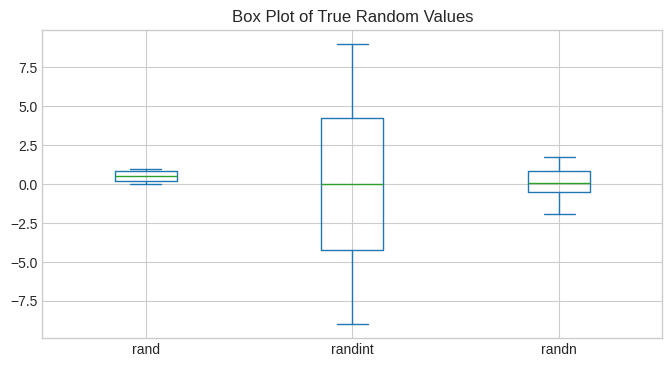

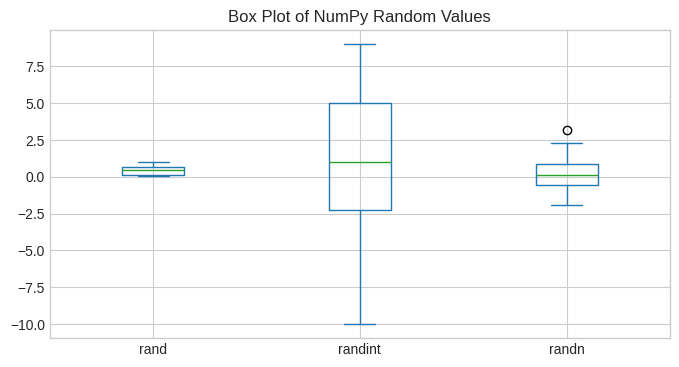

In [12]:
DATA.plot(kind='box', figsize=(8, 4), title="Box Plot of True Random Values")
plt.grid(True)
plt.show()

DATA_np.plot(kind='box', figsize=(8, 4), title="Box Plot of NumPy Random Values")
plt.grid(True)
plt.show()


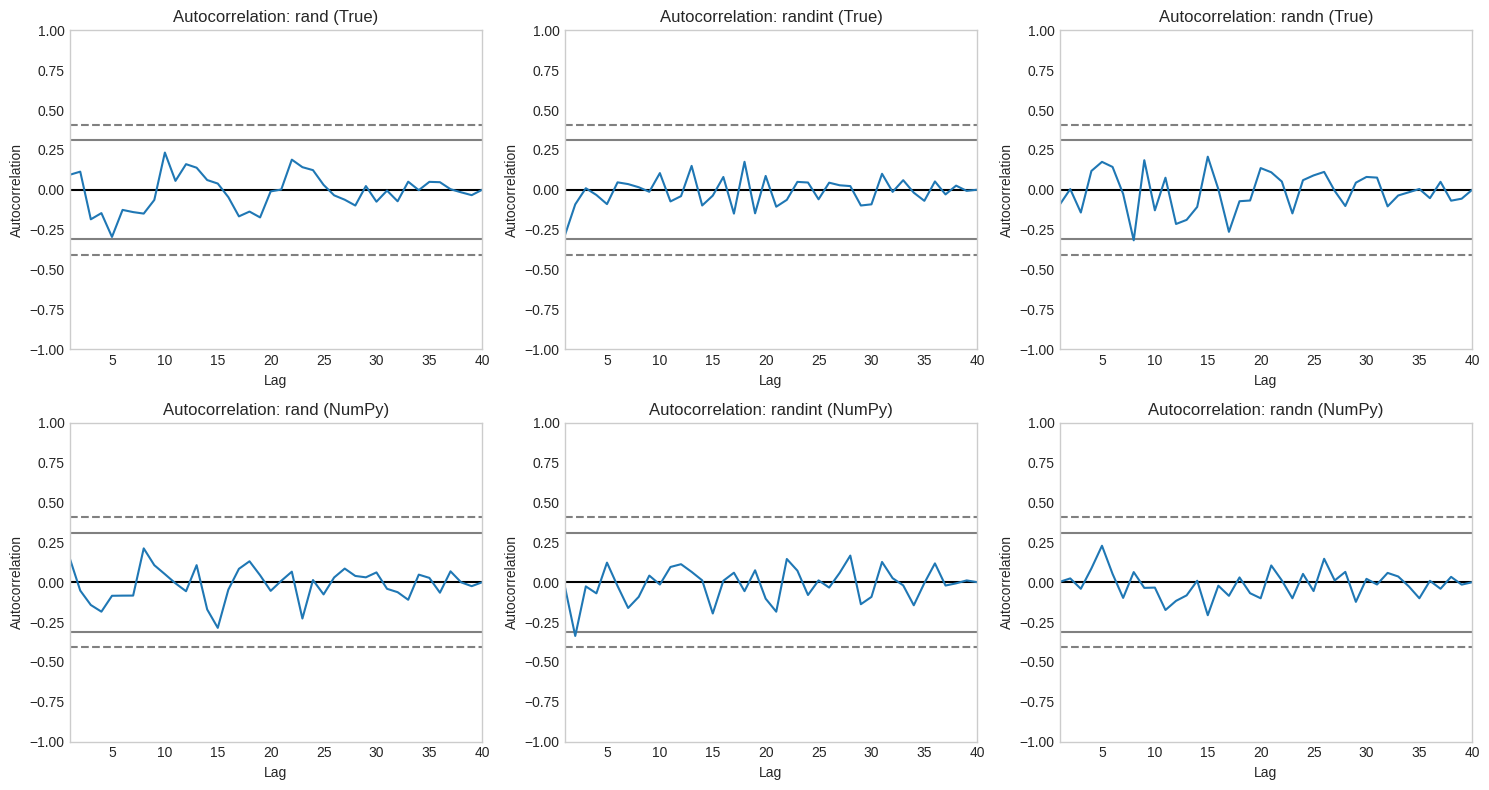

In [13]:
from pandas.plotting import autocorrelation_plot

cols = DATA.columns
n = len(cols)

fig, axs = plt.subplots(2, n, figsize=(5 * n, 8), dpi=dpi)

for i, col in enumerate(cols):
    plt.sca(axs[0, i])
    autocorrelation_plot(DATA[col])
    axs[0, i].set_title(f"Autocorrelation: {col} (True)")

    plt.sca(axs[1, i])
    autocorrelation_plot(DATA_np[col])
    axs[1, i].set_title(f"Autocorrelation: {col} (NumPy)")

plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import entropy

def calc_entropy(series, bins=20):
    counts, _ = np.histogram(series, bins=bins)
    probs = counts / counts.sum()
    return entropy(probs)

for col in DATA.columns:
    print(f"True {col} Entropy:", calc_entropy(DATA[col]))

def calc_entropy(series, bins=20):
    counts, _ = np.histogram(series, bins=bins)
    probs = counts / counts.sum()
    return entropy(probs)

for col in DATA_np.columns:
    print(f"NumPy {col} Entropy:", calc_entropy(DATA_np[col]))


True rand Entropy: 2.6099150724916775
True randint Entropy: 2.8394353820935447
True randn Entropy: 2.651336846633396
NumPy rand Entropy: 2.522932899087225
NumPy randint Entropy: 2.8001917713112037
NumPy randn Entropy: 2.631491227925561
